In [77]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D , Flatten , Dense ,BatchNormalization , Dropout



In [81]:
classifier = tf.keras.models.Sequential([
    # 77 75
    
    tf.keras.layers.Input(shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  

])


In [82]:


classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



Found 3426 images belonging to 2 classes.
Found 858 images belonging to 2 classes.
Epoch 1/40
107/107 ━━━━━━━━━━━━━━━━━━━━ 17s 125ms/step - accuracy: 0.6359 - loss: 0.6553 - val_accuracy: 0.6449 - val_loss: 0.6644
Epoch 2/40
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5938 - loss: 0.6844 - val_accuracy: 0.6234 - val_loss: 0.6414
Epoch 3/40
107/107 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step - accuracy: 0.6754 - loss: 0.6092 - val_accuracy: 0.7102 - val_loss: 0.5900
Epoch 4/40
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7188 - loss: 0.5859 - val_accuracy: 0.6948 - val_loss: 0.6037
Epoch 5/40
107/107 ━━━━━━━━━━━━━━━━━━━━ 14s 124ms/step - accuracy: 0.6284 - loss: 0.6419 - val_accuracy: 0.6861 - val_loss: 0.6535
Epoch 6/40
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6250 - loss: 0.5421 - val_accuracy: 0.6623 - val_loss: 0.8151
Epoch 7/40
107/107 ━━━━━━━━━━━━━━━━━━━━ 14s 122ms/step - accuracy: 0.6992 - loss: 0.5976 - val_accuracy: 0.6648 - val_loss: 0.6420
Epoch 8/4

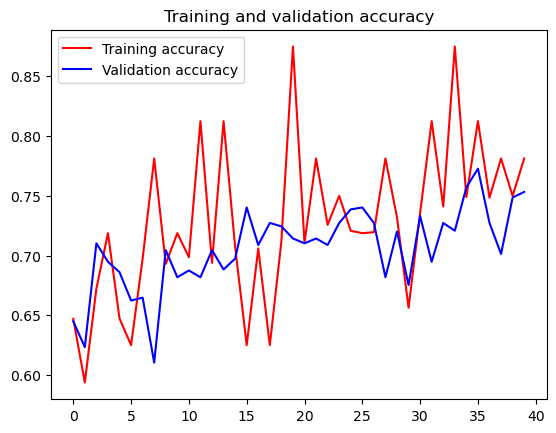

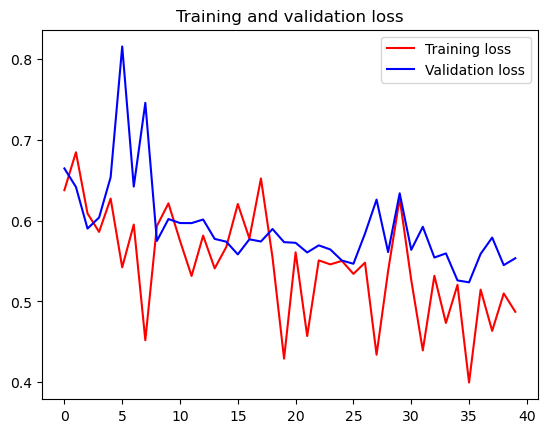

In [83]:
import tensorflow as tf

# Image augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,                # Rescale pixel values from [0, 255] to [0, 1]
    shear_range=0.2,               # Apply random shear transformations
    zoom_range=0.2,                # Apply random zoom transformations
    horizontal_flip=True           # Randomly flip images horizontally
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)  # Only rescale test/validation data

# Load images
training_set = train_datagen.flow_from_directory(
    'dataset/train',        # Directory with training images
    target_size=(64, 64),          # Resize all images to 64x64
    batch_size=32,                 # Number of images to be yielded from the generator per batch
    class_mode='binary'            # Type of label arrays to be returned ('binary' for binary classification)
)

test_set = test_datagen.flow_from_directory(
    'dataset/test',            # Directory with test/validation images
    target_size=(64, 64),          # Resize all images to 64x64
    batch_size=32,                 # Number of images to be yielded from the generator per batch
    class_mode='binary'            # Type of label arrays to be returned ('binary' for binary classification)
)




history = classifier.fit(
    training_set,
    steps_per_epoch=int(3426/32),       # Convert to integer
    epochs=40,
    validation_data=test_set,
    validation_steps=int(720/32),     
)

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [91]:
# # Evaluate the model on the training set
# train_loss, train_accuracy = classifier.evaluate(training_set)
# print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# # Evaluate the model on the validation set
# validation_loss, validation_accuracy = classifier.evaluate(test_set)
# print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

In [85]:
import numpy as np
from tensorflow.keras.preprocessing import image


def predict_image(image_path):
    img = image.load_img(image_path, target_size=(64, 64))  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale the image

    prediction = classifier.predict(img_array)  # Predict the class
    if prediction[0] > 0.5:
        print(f"The image at {image_path} is a Shell")
    else:
        print(f"The image at {image_path} is a Pebble")

# Example usage
image_path = 'dataset/predict.jpg'  # Path to the image to be predicted
predict_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The image at dataset/predict.jpg is a Pebble


In [86]:


# Example usage
image_path = 'dataset/r.jpg'  # Path to the image to be predicted
predict_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The image at dataset/r.jpg is a Shell
